In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:

from fastai.basics import * #import needed parts of fastai library

In [3]:
from google.colab import drive #mount to google drive
drive.mount('/content/drive/')
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'fastai'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
!ls "/content/drive/My Drive/fastai" #see directory

 대학원생명단2020010ANT6320_01.xls		 electronic_piano.txt
 대학원생명단2020010ANT6320_01.xls.gdoc		 export.pkl
'학부수강생명단2020010MAS2009_01 (1).xls.gdoc'	 grand
 학부수강생명단2020010MAS2009_01.xls		 grand_piano.txt
 학부수강생명단2020010MAS2009_01.xls.gdoc	'Machine Learning 수업.gsheet'
'Copy of 00_notebook_tutorial.ipynb'		 models
'Copy of lesson1-pets.ipynb'			 upright
 electronic					 upright_piano.txt


In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [6]:
x = torch.ones(n,2) # x, y
x[:,0].uniform_(-1.,1) # set values between -1 and 1
x[:5] #see the first 5 rows

tensor([[-0.6108,  1.0000],
        [ 0.1646,  1.0000],
        [ 0.9414,  1.0000],
        [ 0.0828,  1.0000],
        [ 0.4714,  1.0000]])

In [7]:
a = tensor(4.,7); a #set a tensor with float values : 4 and 7

tensor([4., 7.])

In [0]:
y = x@a + torch.rand(n) #matrix product between x and a + rand

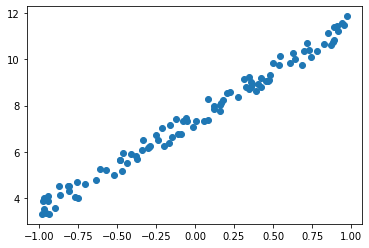

In [9]:
plt.scatter(x[:,0], y); #not scattering the 1s

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() #element-wise arithmetic --> vector of the difference between the two vectors --> find the average square of the differences between the actuals and the predictions.

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1) 

In [12]:
y_hat = x@a #matrix product
mse(y_hat, y) #mean squared error

tensor(50.9294)

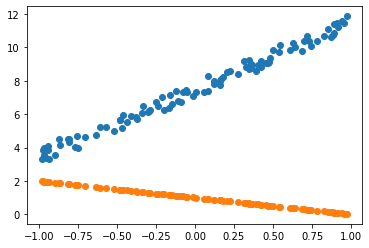

In [13]:
plt.scatter(x[:,0],y) #lets look at the difference
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [14]:
a = nn.Parameter(a); a #define a as a parameter containing the tensor a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a #matrix product --> prediction
    loss = mse(y, y_hat) #loss = mean squared error
    if t % 10 == 0: print(loss) #print loss 
    loss.backward() #calculates the gradient
    with torch.no_grad(): #derivate is in grad
        a.sub_(lr * a.grad) #substract coefficients from gradient sub, lr is learning rate we multiply it by the gradient
        a.grad.zero_()

In [16]:
lr = 1e-1
for t in range(100): update() #update the learning rate

tensor(50.9294, grad_fn=<MeanBackward0>)
tensor(2.6099, grad_fn=<MeanBackward0>)
tensor(0.5756, grad_fn=<MeanBackward0>)
tensor(0.1957, grad_fn=<MeanBackward0>)
tensor(0.1053, grad_fn=<MeanBackward0>)
tensor(0.0835, grad_fn=<MeanBackward0>)
tensor(0.0783, grad_fn=<MeanBackward0>)
tensor(0.0770, grad_fn=<MeanBackward0>)
tensor(0.0767, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)


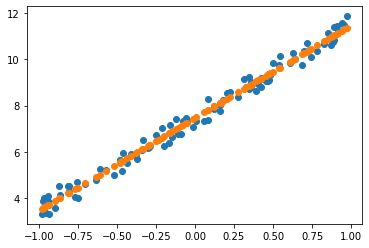

In [17]:
plt.scatter(x[:,0],y)
with torch.no_grad():
  plt.scatter(x[:,0],x@a); # plot everything

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [19]:
a = nn.Parameter(tensor(-1.,1)) #put a tensor in a parameter

fig = plt.figure() #make a figure to plot
plt.scatter(x[:,0], y, c='orange') #plot this one in orange
with torch.no_grad():
  line, = plt.plot(x[:,0], x@a) #this one will be in blue
plt.close()

def animate(i): # make the animation through the calcuation of x@a
    update()
    with torch.no_grad():
      line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.